In [1]:
# import
import pandas as pd
import numpy as np

# finance data sources
# pandas_datareader is remote data access for pandas
import yfinance as yf
import pandas_datareader as pdr

# data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

### 1) Understanding Data-Driven Decisions data pulls

In [2]:
# initializing current date
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

# initializing index year period
start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=18
Period for indexes: 1954-04-18 to 2024-04-18 


##### 1.1) GDP

In [3]:
# GDP
# https://fred.stlouisfed.org/series/GDPPOT
# Federal Reserve Economic Data - FRED. Economic data source
# Gross Domestic Product Potential - GDPPOT
# data read using pandas datareader
gdppot = pdr.DataReader("GDPPOT", "fred", start=start, end=end)

In [4]:
# current value divide previous value to get growth as in ratio
# minus 1 to get percentage value
# shift by 4 to get quarterly result
# by default, tail only get 5 rows
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1

# average_yoy_growth = gdppot['gdppot_us_yoy'].sum() / len(gdppot)
# print(average_yoy_growth)
gdppot.tail()

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2023-04-01,22246.23,0.021312,0.021312
2023-07-01,22369.71,0.021719,0.021719
2023-10-01,22495.19,0.022190,0.022190
2024-01-01,22618.15,0.022251,0.022251
2024-04-01,22739.00,0.022151,0.022151


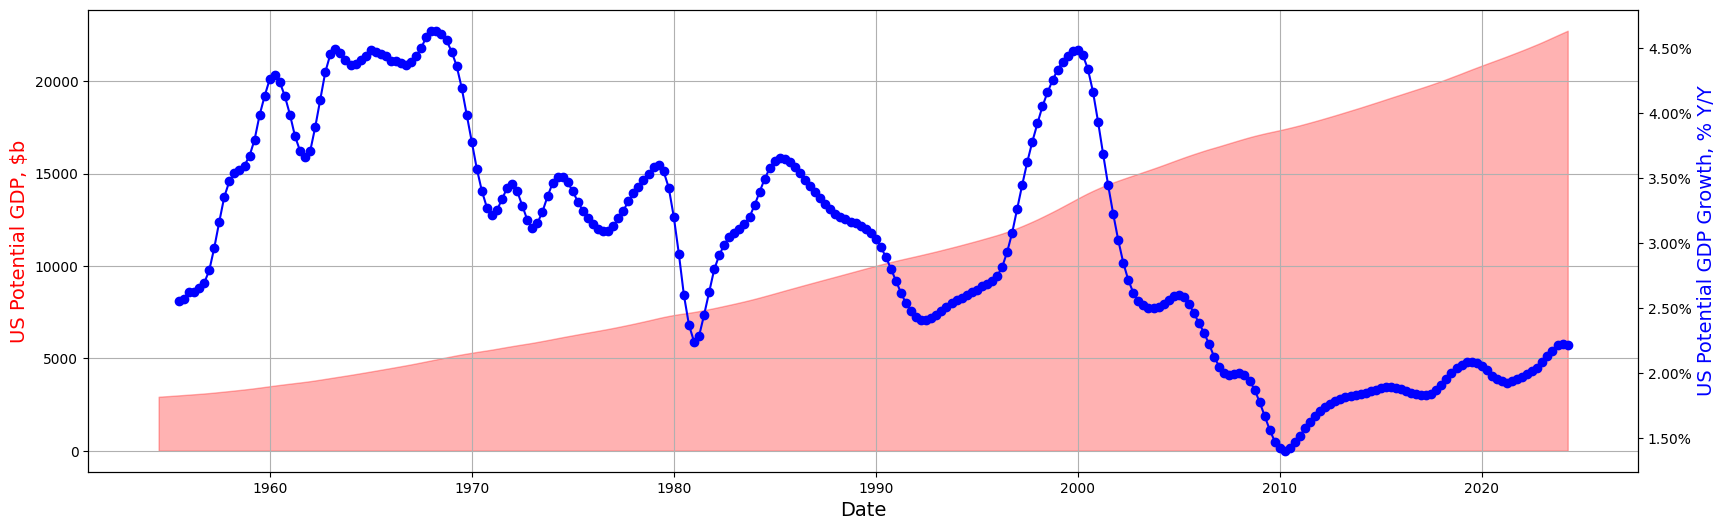

In [5]:
# Visualizing GDPPOT
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plot area under GDPPOT
ax.fill_between(gdppot.index, gdppot.GDPPOT, color="red", alpha=0.3, label="US Potential GDP")

# secondary y-axis
# GDP growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(gdppot.gdppot_us_yoy, color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")

# labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("US Potential GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("US Potential GDP Growth, % Y/Y", color="blue", fontsize=14)
plt.show()



##### 1.2) Inflation - CPI Core

In [6]:
# Inflation - Core CPI Index 
# https://fred.stlouisfed.org/series/CPIAUCSL 
# Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
cpifesl = pdr.DataReader("CPILFESL", "fred", start=start)

In [7]:
cpifesl['cpi_core_yoy'] = cpifesl.CPILFESL/cpifesl.CPILFESL.shift(12)-1
cpifesl['cpi_core_mom'] = cpifesl.CPILFESL/cpifesl.CPILFESL.shift(1)-1

cpifesl.tail(13)

,CPILFESL,cpi_core_yoy,cpi_core_mom
DATE,,,
2023-03-01,305.112,0.055601,0.003249
2023-04-01,306.539,0.055157,0.004677
2023-05-01,307.646,0.053322,0.003611
2023-06-01,308.245,0.048552,0.001947
2023-07-01,308.945,0.047076,0.002271
2023-08-01,309.656,0.044128,0.002301
2023-09-01,310.644,0.041437,0.003191
2023-10-01,311.390,0.040217,0.002401
2023-11-01,312.349,0.040151,0.003080


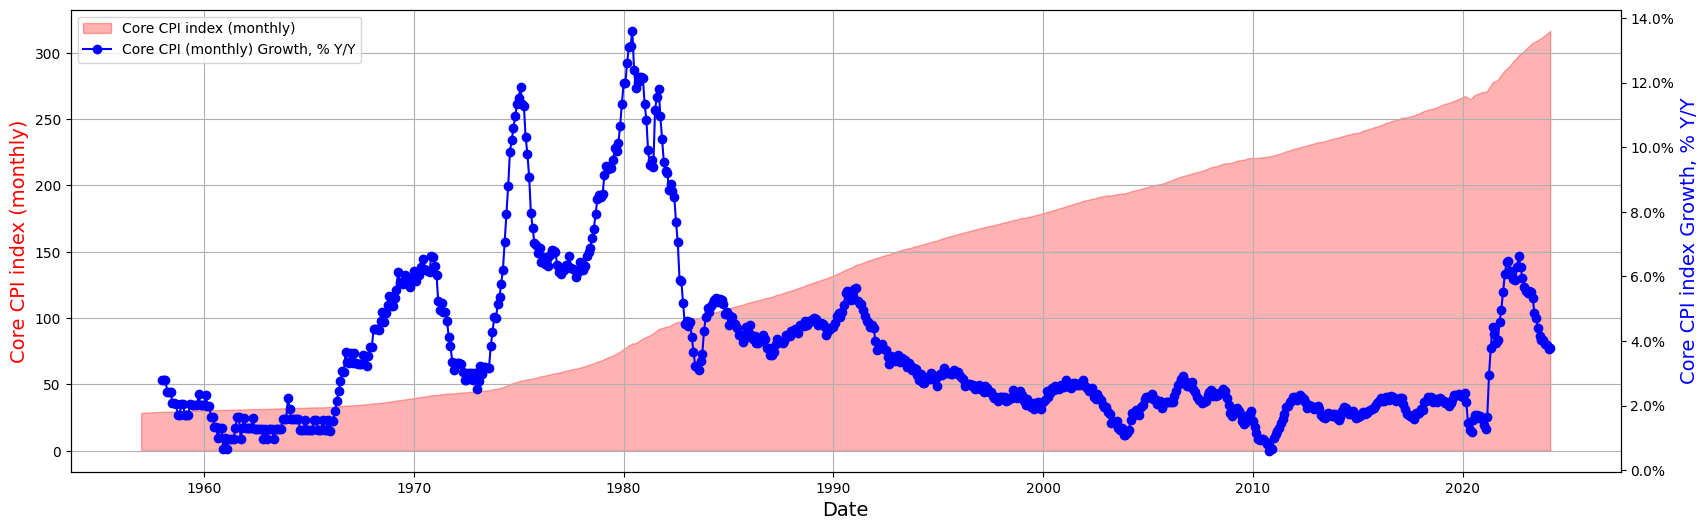

In [8]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plot area under CPI
ax.fill_between(cpifesl.index, cpifesl.CPILFESL, color="red", alpha=0.3, label="Core CPI index (monthly)")

# secondary y-axis
# CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(cpifesl.cpi_core_yoy, color="blue", marker="o", label="Core CPI (monthly) Growth, % Y/Y")

# labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Core CPI index (monthly)", color="red", fontsize=14)
ax2.set_ylabel("Core CPI index Growth, % Y/Y", color="blue", fontsize=14)

# legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left")

plt.show()

##### 1.3) Interest rates

In [9]:
# interest rates
# https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail()

,FEDFUNDS
DATE,
2023-11-01,5.33
2023-12-01,5.33
2024-01-01,5.33
2024-02-01,5.33
2024-03-01,5.33
